In [96]:
import pandas as pd

ground_truth_df = pd.read_csv('ground_truth.csv', index_col=0)
ground_truth_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
ground_truth_df.head()


,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092256,0,SP95550,Uterus-AdenoCA
1,0.063790,1,SP95550,Uterus-AdenoCA
2,0.158236,4,SP95550,Uterus-AdenoCA
3,0.099229,16,SP95550,Uterus-AdenoCA
4,0.586489,44,SP95550,Uterus-AdenoCA


In [2]:
ground_truth_df['Cancer Types'].value_counts()

Panc-AdenoCA           1050
Prost-AdenoCA           947
Liver-HCC               945
Breast-AdenoCA          914
Eso-AdenoCA             534
Skin-Melanoma           518
Lymph-BNHL              506
Ovary-AdenoCA           476
Kidney-RCC              432
CNS-Medullo             430
Stomach-AdenoCA         410
Panc-Endocrine          323
Lymph-CLL               281
Head-SCC                273
CNS-PiloAstro           243
ColoRect-AdenoCA        232
Uterus-AdenoCA          193
Lung-SCC                182
Bone-Osteosarc          163
Thy-AdenoCA             153
Lung-AdenoCA            152
Biliary-AdenoCA         147
Kidney-ChRCC            137
Myeloid-MPN             128
CNS-GBM                 110
Bladder-TCC              97
SoftTissue-Liposarc      95
Cervix-SCC               79
Breast-LobularCA         58
SoftTissue-Leiomyo       55
Bone-Benign              49
CNS-Oligo                38
Bone-Epith               38
Myeloid-AML              26
Myeloid-MDS               9
Breast-DCIS         

In [3]:
experiment_df = pd.read_csv('/home/amso/Documents/mutation_signatures/output/experiment.csv', index_col=0)
experiment_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092292,0,SP95550,Uterus-AdenoCA
1,0.063734,1,SP95550,Uterus-AdenoCA
2,0.158121,4,SP95550,Uterus-AdenoCA
3,0.099349,16,SP95550,Uterus-AdenoCA
4,0.586503,44,SP95550,Uterus-AdenoCA


In [4]:
experiment_sig_profiler_df = pd.read_csv('experiment_sig_profiles.csv', index_col=0)
experiment_sig_profiler_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_sig_profiler_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092292,0,SP95550,Uterus-AdenoCA
1,0.063844,1,SP95550,Uterus-AdenoCA
2,0.158231,4,SP95550,Uterus-AdenoCA
3,0.099239,16,SP95550,Uterus-AdenoCA
4,0.586393,44,SP95550,Uterus-AdenoCA


In [5]:
experiment_signal_df = pd.read_csv('experiment_signal.csv', index_col=0)
experiment_signal_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_signal_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092732,0,SP95550,Uterus-AdenoCA
1,0.064254,1,SP95550,Uterus-AdenoCA
2,0.154181,4,SP95550,Uterus-AdenoCA
3,0.099884,16,SP95550,Uterus-AdenoCA
4,0.588950,44,SP95550,Uterus-AdenoCA


In [6]:
def calculate_metrics(predicted, actual, total_values):
    predicted_set = set(predicted)
    actual_set = set(actual)
    all_values_set = set(range(total_values))

    true_positives = len(predicted_set.intersection(actual_set))
    true_negatives = len(all_values_set.difference(actual_set).difference(predicted_set))

    false_negatives = actual_set.difference(predicted_set)
    false_positives = predicted_set.difference(actual_set)

    total_positives = len(actual_set)
    total_negatives = total_values - total_positives

    sensitivity = true_positives / total_positives if total_positives else 0
    specificity = true_negatives / total_negatives if total_negatives else 0

    return sensitivity, specificity, false_negatives, false_positives


In [7]:
ground_truth_df['Sample Names'].unique()

array(['SP95550', 'SP90629', 'SP89909', ..., 'SP117627', 'SP117556',
       'SP117655'], dtype=object)

In [8]:
import pandas as pd

results = []
total_values = 67

for patient in ground_truth_df['Sample Names'].unique():
    try:
        actual = ground_truth_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted = experiment_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted_sig_profile = experiment_sig_profiler_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted_signal = experiment_signal_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
    except:
        print(f'error: patient', patient)
        continue
    sensitivity, specificity, false_negatives, false_positives = calculate_metrics(predicted, actual, total_values)
    sensitivity_sig_profile, specificity_sig_profile, false_negatives_sig_profile, false_positives_sig_profile = calculate_metrics(predicted_sig_profile, actual, total_values)
    sensitivity_signal, specificity_signal, false_negatives_signal, false_positives_signal = calculate_metrics(predicted_signal, actual, total_values)

    results.append({
        'Pacjent': patient,
        'Sensitivity_our': sensitivity,
        'Specificity_our': specificity,
        'Sensitivity_sig_profile':sensitivity_sig_profile,
        'Specificity_sig_profile':specificity_sig_profile,
        'Sensitivity_signal':sensitivity_signal,
        'Specificity_signal':specificity_signal,
        'false_negatives_our':  {} if len(false_negatives) == 0 else false_negatives,
        'false_positives_our': {} if len(false_positives) == 0 else false_positives,
        'false_negatives_sig_profile':  {} if len(false_negatives_sig_profile) == 0 else false_negatives_sig_profile,
        'false_positives_sig_profile': {} if len(false_positives_sig_profile) == 0 else false_positives_sig_profile,
        'false_negatives_signal':  {} if len(false_negatives_signal) == 0 else false_negatives_signal,
        'false_positives_signal': {} if len(false_positives_signal) == 0 else false_positives_signal
    })

# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results)


error: patient SP86775
error: patient SP85818


In [9]:
results_df['Sensitivity_our'].mean(), results_df['Sensitivity_sig_profile'].mean(), results_df['Sensitivity_signal'].mean()

(0.9896699192868329, 0.9892055460902588, 0.8802413363851744)

In [10]:
results_df['Specificity_our'].mean(), results_df['Specificity_sig_profile'].mean(), results_df['Specificity_signal'].mean()

(0.9963731161814123, 0.9963115913065274, 0.9991843755945591)

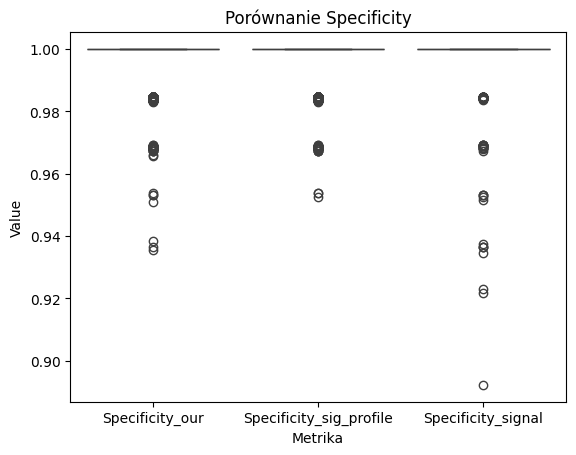

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Specificity_our', 'Specificity_sig_profile', 'Specificity_signal'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Specificity')
plt.xlabel('Metrika')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()

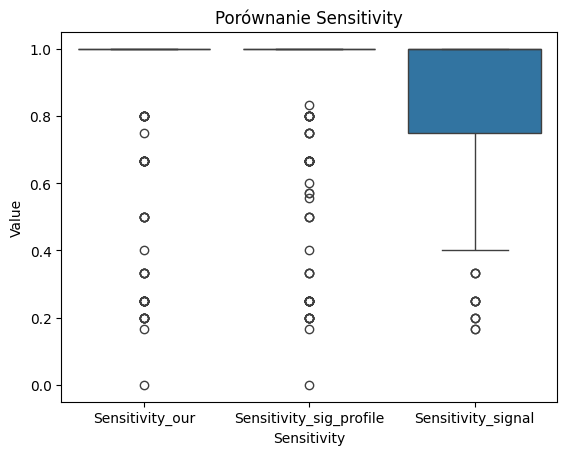

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Sensitivity_our', 'Sensitivity_sig_profile', 'Sensitivity_signal'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Sensitivity')
plt.xlabel('Sensitivity')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()


In [13]:
results_df

,Pacjent,Sensitivity_our,Specificity_our,Sensitivity_sig_profile,Specificity_sig_profile,Sensitivity_signal,Specificity_signal,false_negatives_our,false_positives_our,false_negatives_sig_profile,false_positives_sig_profile,false_negatives_signal,false_positives_signal
0,SP95550,1.0,1.000000,1.0,1.000000,1.00,1.0,{},{},{},{},{},{}
1,SP90629,1.0,1.000000,1.0,1.000000,0.75,1.0,{},{},{},{},{0},{}
2,SP89909,1.0,1.000000,1.0,1.000000,1.00,1.0,{},{},{},{},{},{}
3,SP91265,1.0,1.000000,1.0,1.000000,1.00,1.0,{},{},{},{},{},{}
4,SP92931,1.0,1.000000,1.0,1.000000,1.00,1.0,{},{},{},{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,SP117332,1.0,1.000000,1.0,1.000000,1.00,1.0,{},{},{},{},{},{}
2763,SP117775,1.0,1.000000,1.0,1.000000,1.00,1.0,{},{},{},{},{},{}
2764,SP117627,1.0,0.984127,1.0,0.984127,1.00,1.0,{},{16},{},{16},{},{}
2765,SP117556,1.0,1.000000,1.0,1.000000,1.00,1.0,{},{},{},{},{},{}


In [14]:
import pandas as pd

signatures_false_negatives_our, signatures_false_positives_our = [], []
signatures_false_negatives_sig_profile, signatures_false_positives_sig_profile = [], []
signatures_false_negatives_signal, signatures_false_positives_signal = [], []

for idx, row in results_df.iterrows():
    for item in row['false_negatives_our']:
      signatures_false_negatives_our.append({'Count': row['Pacjent'], 'signature_false_negatives_our': item})
    for item in row['false_positives_our']:
      signatures_false_positives_our.append({'Count': row['Pacjent'], 'signature_false_positives_our': item})
    
    for item in row['false_negatives_sig_profile']:
      signatures_false_negatives_sig_profile.append({'Count': row['Pacjent'], 'signature_false_negatives_sig_profile': item})
    for item in row['false_positives_sig_profile']:
      signatures_false_positives_sig_profile.append({'Count': row['Pacjent'], 'signature_false_positives_sig_profile': item})

    for item in row['false_negatives_signal']:
      signatures_false_negatives_signal.append({'Count': row['Pacjent'], 'signature_false_negatives_signal': item})
    for item in row['false_positives_signal']:
      signatures_false_positives_signal.append({'Count': row['Pacjent'], 'signature_false_positives_signal': item})


# Teraz możesz wykonać grupowanie na podstawie elementów
grouped_fn_our = pd.DataFrame(signatures_false_negatives_our).groupby('signature_false_negatives_our').count().reset_index()
grouped_fp_our = pd.DataFrame(signatures_false_positives_our).groupby('signature_false_positives_our').count().reset_index()
grouped_fn_sig_profile = pd.DataFrame(signatures_false_negatives_sig_profile).groupby('signature_false_negatives_sig_profile').count().reset_index()
grouped_fp_sig_profile = pd.DataFrame(signatures_false_positives_sig_profile).groupby('signature_false_positives_sig_profile').count().reset_index()

grouped_fn_signal = pd.DataFrame(signatures_false_negatives_signal).groupby('signature_false_negatives_signal').count().reset_index()
grouped_fp_signal = pd.DataFrame(signatures_false_positives_signal).groupby('signature_false_positives_signal').count().reset_index()

In [15]:
grouped_fn_our['Count'].sum(), grouped_fn_sig_profile['Count'].sum(), grouped_fn_signal['Count'].sum()
#sygnatura była istotna, a nie jest wykryta

(118, 131, 1561)

In [16]:
grouped_fp_our['Count'].sum(), grouped_fp_sig_profile['Count'].sum(), grouped_fp_signal['Count'].sum()
#sygnatura nie była istotna, a jest wykryta

(635, 647, 144)

In [17]:
combined_df_fn = pd.merge(grouped_fn_our, grouped_fn_sig_profile, left_on='signature_false_negatives_our', right_on='signature_false_negatives_sig_profile', how='outer').fillna(0)
combined_df_fn = pd.merge(combined_df_fn, grouped_fn_signal, left_on='signature_false_negatives_our', right_on='signature_false_negatives_signal', how='outer').fillna(0)

In [32]:
indexes = ['SBS1', 'SBS2', 'SBS3', 'SBS4', 'SBS5', 'SBS6', 'SBS7a', 'SBS7b',
           'SBS7c', 'SBS7d', 'SBS8', 'SBS9', 'SBS10a', 'SBS10b', 'SBS11', 'SBS12',
           'SBS13', 'SBS14', 'SBS15', 'SBS16', 'SBS17a', 'SBS17b', 'SBS18',
           'SBS19', 'SBS20', 'SBS21', 'SBS22', 'SBS23', 'SBS24', 'SBS25', 'SBS26',
           'SBS27', 'SBS28', 'SBS29', 'SBS30', 'SBS31', 'SBS32', 'SBS33', 'SBS34',
           'SBS35', 'SBS36', 'SBS37', 'SBS38', 'SBS39', 'SBS40', 'SBS41', 'SBS42',
           'SBS43', 'SBS44', 'SBS45', 'SBS46', 'SBS47', 'SBS48', 'SBS49', 'SBS50',
           'SBS51', 'SBS52', 'SBS53', 'SBS54', 'SBS55', 'SBS56', 'SBS57', 'SBS58',
           'SBS59', 'SBS60', 'SBS84', 'SBS85']


mapping = {index: name for index, name in enumerate(indexes)}


In [66]:
grouped_fn_our['signatures_cat_our'] = grouped_fn_our['signature_false_negatives_our'].map(mapping)
grouped_fn_signal['signatures_cat_signal'] = grouped_fn_signal['signature_false_negatives_signal'].map(mapping)
grouped_fn_sig_profile['signatures_cat_sig_profile'] = grouped_fn_sig_profile['signature_false_negatives_sig_profile'].map(mapping)


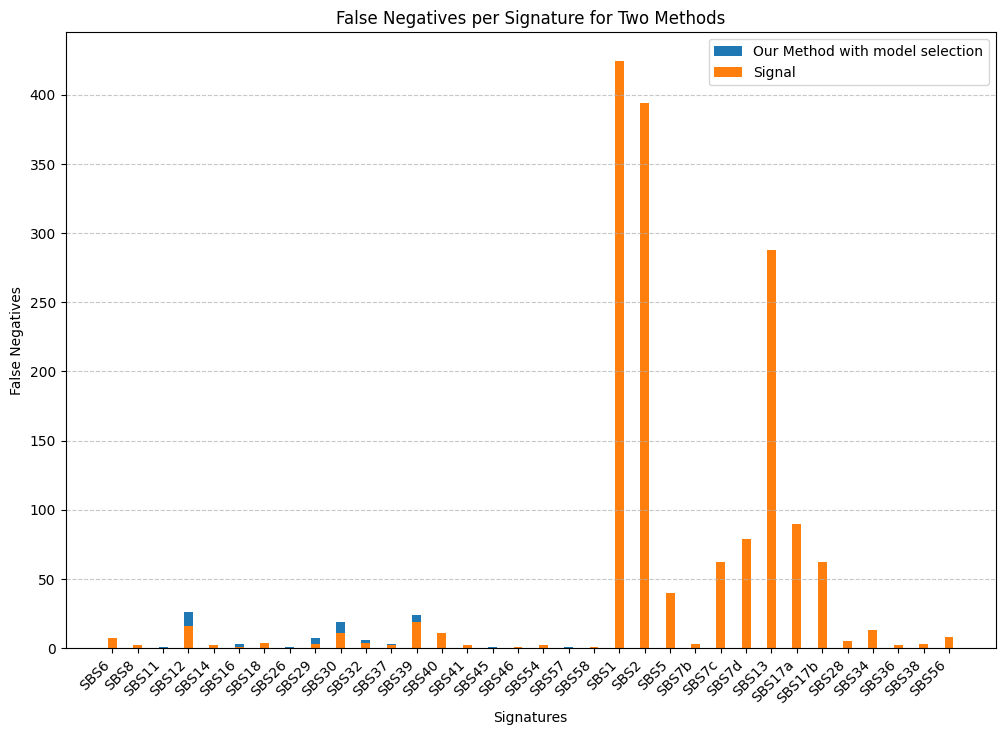

In [69]:
import matplotlib.pyplot as plt

# Twoje wcześniejsze ustawienia i dane
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

# Rysowanie wykresów słupkowych
bar1 = ax.bar(grouped_fn_our['signatures_cat_our'], grouped_fn_our['Count'], bar_width, label='Our Method with model selection')
#bar2 = ax.bar(combined_df_fn['signature_false_negatives_sig_profile'] + bar_width/2, combined_df_fn['Count_y'], bar_width, label='Sig Profiler Assigment')
bar3 = ax.bar(grouped_fn_signal['signatures_cat_signal'], grouped_fn_signal['Count'], bar_width, label='Signal')

# Ustawienia etykiet i tytułu
ax.set_xlabel('Signatures')
ax.set_ylabel('False Negatives')
ax.set_title('False Negatives per Signature for Two Methods')
ax.legend()
plt.xticks(rotation=45, ha='right')
# Dodanie siatki i wyświetlenie wykresu
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [70]:
grouped_fp_our['signatures_cat_our'] = grouped_fp_our['signature_false_positives_our'].map(mapping)
grouped_fp_signal['signatures_cat_signal'] = grouped_fp_signal['signature_false_positives_signal'].map(mapping)
grouped_fp_sig_profile['signatures_cat_sig_profile'] = grouped_fp_sig_profile['signature_false_positives_sig_profile'].map(mapping)


In [23]:
labels_for_plots = pd.read_csv('data/WGS-decomposition__PCAWG_sigProfiler_SBS_signatures_in_samples.csv')

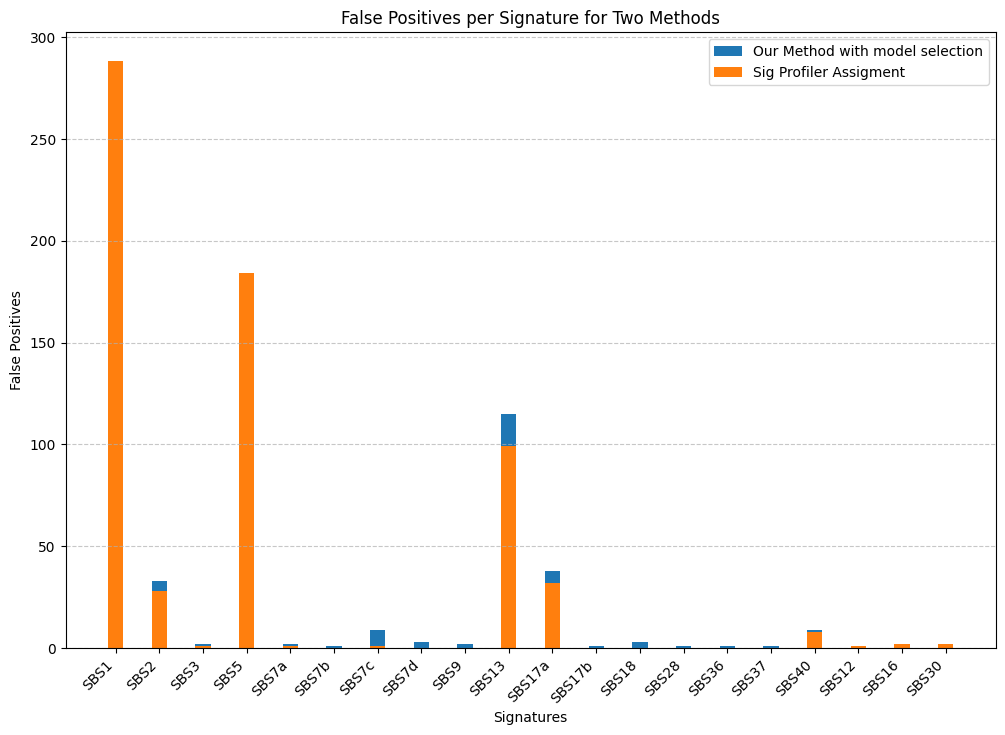

In [74]:
import matplotlib.pyplot as plt

# Twoje wcześniejsze ustawienia i dane
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

# Rysowanie wykresów słupkowych
bar1 = ax.bar(grouped_fp_our['signatures_cat_our'], grouped_fp_our['Count'], bar_width, label='Our Method with model selection')
bar2 = ax.bar(grouped_fp_sig_profile['signatures_cat_sig_profile'], grouped_fp_sig_profile['Count'], bar_width, label='Sig Profiler Assigment')
#bar3 = ax.bar(combined_df_fp['signature_falsepositive_signal'] + bar_width/2, combined_df_fn['Count'], bar_width, label='Signal')

# Ustawienia etykiet i tytułu
ax.set_xlabel('Signatures')
ax.set_ylabel('False Positives')
ax.set_title('False Positives per Signature for Two Methods')
ax.legend()
plt.xticks(rotation=45, ha='right')

# Dodanie siatki i wyświetlenie wykresu
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [95]:
ground_truth_df

,findSigExposures,best_columns,Cancer Types,Sample Names
0,0.092292,0,SP95550,Uterus-AdenoCA
1,0.063844,1,SP95550,Uterus-AdenoCA
2,0.158231,4,SP95550,Uterus-AdenoCA
3,0.099239,16,SP95550,Uterus-AdenoCA
4,0.586393,44,SP95550,Uterus-AdenoCA
...,...,...,...,...
10968,0.100416,0,SP117655,Biliary-AdenoCA
10969,0.086992,1,SP117655,Biliary-AdenoCA
10970,0.122097,4,SP117655,Biliary-AdenoCA
10971,0.054101,16,SP117655,Biliary-AdenoCA


In [103]:
import pandas as pd
import numpy as np

# Funkcja do tworzenia wektora dla danej grupy
def create_vector(group):
    vector = np.zeros(67)
    for _, row in group.iterrows():
        index = row['best_columns']
        if index < 67:
            vector[index] = row['findSigExposures']
    return vector

def spearman_correlation(x, y):
    rx = np.argsort(np.argsort(x))
    ry = np.argsort(np.argsort(y))  
    return np.corrcoef(rx, ry)[0, 1]
    

# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_df.groupby('Sample Names').apply(create_vector)

correlations_our = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_our[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_our = pd.DataFrame(list(correlations_our.items()), columns=['Sample Names', 'Correlation'])

SP85818
SP86775


In [104]:
# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_sig_profiler_df.groupby('Sample Names').apply(create_vector)

correlations_sig_profile = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_sig_profile[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_sig_profile = pd.DataFrame(list(correlations_sig_profile.items()), columns=['Sample Names', 'Correlation'])

In [105]:
# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_signal_df.groupby('Sample Names').apply(create_vector)

correlations_signal = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_signal[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_signal = pd.DataFrame(list(correlations_signal.items()), columns=['Sample Names', 'Correlation'])

In [107]:
correlations_df_our['Correlation'].mean(), correlations_df_signal['Correlation'].mean(), correlations_df_sig_profile['Correlation'].mean()

(0.981273413155278, 0.9706449185235866, 0.9790078927325585)

In [90]:
import pandas as pd 



import numpy as np
from utils import save_to_dataframe

tumorBRCA = np.genfromtxt('data/M.csv', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

df = pd.read_csv('data/WGS-decomposition__PCAWG_sigProfiler_SBS_signatures_in_samples.csv')
SigProfilerAssignment = pd.read_csv('output/Assignment_Solution/Activities/Assignment_Solution_Activities.txt',sep='\t')


ground_truth = SigProfilerAssignment.drop(columns=['Samples'])

ground_truth.columns = [x for x in range(0, 67)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), SigProfilerAssignment.iloc[i]['Samples'], df.iloc[i]['Cancer Types'])
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('experiment_sig_profiles.csv')

In [ ]:
SigProfilerAssignment

In [ ]:
pd.read_csv('output/signal.exposures.csv',sep=',')

In [ ]:
import pandas as pd 



import numpy as np
from utils import save_to_dataframe

tumorBRCA = np.genfromtxt('data/M.csv', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

df = pd.read_csv('data/WGS-decomposition__PCAWG_sigProfiler_SBS_signatures_in_samples.csv')
signalAssignment = pd.read_csv('output/signal.exposures.csv',sep=',')


ground_truth = signalAssignment.drop(columns=['Samples', 'unassigned'])

ground_truth.columns = [x for x in range(0, 67)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), signalAssignment.iloc[i]['Samples'], df.iloc[i]['Cancer Types'])
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('experiment_signal.csv')